In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
drugs = pd.read_csv('raw_data/mouse_drug_data.csv')
tumors = pd.read_csv('raw_data/clinicaltrial_data.csv')

## Preprocessing

In [3]:
data = pd.merge(drugs, tumors, how='inner')

In [4]:
data.shape

(1906, 5)

In [7]:
data = data.rename(columns={\
                            'Mouse ID': 'mouse_id',\
                            'Tumor Volume (mm3)': 'tumor_vol',\
                            'Metastatic Sites': 'mets'})

In [12]:
##filter for drugs of interest
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
mask_drugs = data['Drug'].isin(drugs)
data_drugs = data[mask_drugs]

## Tumor Volume
Scatter plot: tumor volume changes over time for each treatment 

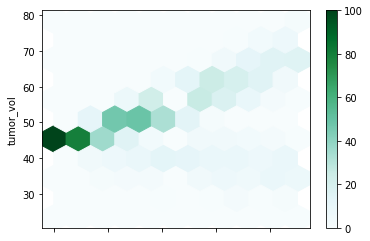

In [18]:
data_drugs.plot.hexbin(x = "Timepoint", y = 'tumor_vol', gridsize=10);

In [19]:
capomulin = data[data.Drug == "Capomulin"]
infubinol = data[data.Drug == "Infubinol"]
ketapril = data[data.Drug == "Ketapril"]
placebo = data[data.Drug == "Placebo"]

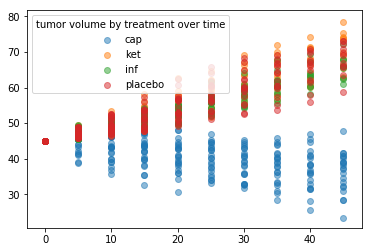

In [20]:
#make subplots? facetgrid? 
plt.scatter(capomulin.Timepoint, capomulin.tumor_vol, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.tumor_vol, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.tumor_vol, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, placebo.tumor_vol, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

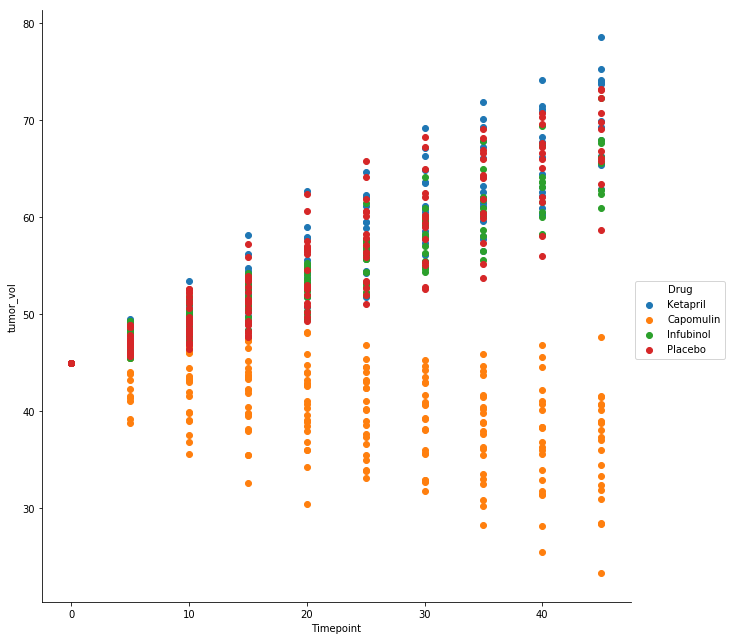

In [27]:
sns.FacetGrid(data_drugs, hue="Drug", size=9,) \
   .map(plt.scatter, "Timepoint", "tumor_vol") \
   .add_legend();

## METASTASES
METS Scatter plot: number of metastatic sites - changes over time for each treatment

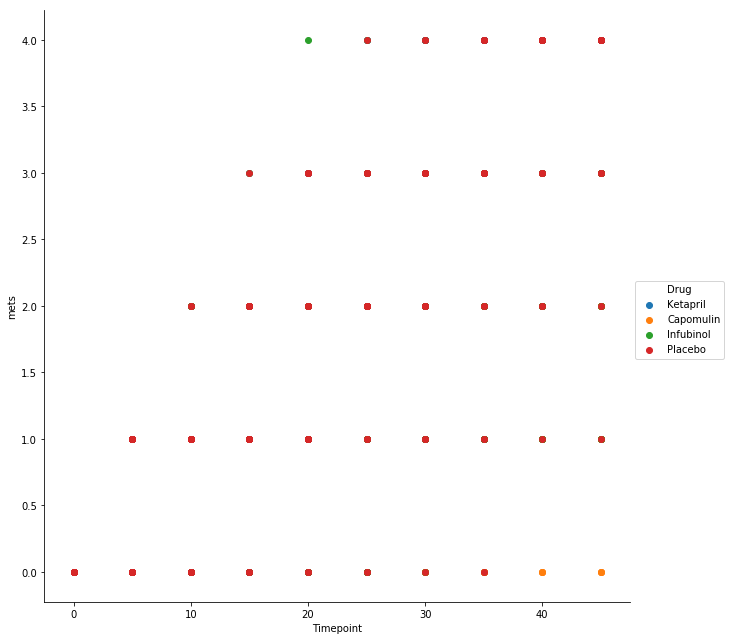

In [28]:
sns.FacetGrid(data_drugs, hue="Drug", size=9,) \
   .map(plt.scatter, "Timepoint", "mets") \
   .add_legend();
#this doesn't make any sense. need to calculate a change column? 
#the overlap masks things so need subplots, maybe

## SURVIVAL RATE

SURVIVALRATE Scatter plot: number of mice still alive through the course of treatment (Survival Rate) ...(operationalize as mouseid that contains all the timepoints)

In [37]:
subjects = data_drugs.groupby('mouse_id')

In [38]:
subjects_sur.mean

<bound method GroupBy.mean of <pandas.core.groupby.DataFrameGroupBy object at 0x1a0b687ba8>>